<center>
    <h1>Pattern Analysis | SS20</h1>
    <hr>
    <br>
    <div style="margin:0 60px 0px 0">
        <img src="imgs/pat.jpg" width=200px align=center>
    </div>
    <h3>Exercises for </h3>
    <h2>Pattern Analysis Programming</h2>
    <br>
</center>

# Density Estimation

`Task 1: April 29 – April 06`

- [Exercise 1](#1)
    - [Exercise 1.1](#1.1)
- [Exercise 2](#2)
    - [Exercise 1.1](#2.1)
    
    
<br>

#### Our First Empirical Distribution: Sampled from a Non-parametric Ground Truth Distribution
A central challenge in statistical machine learning is the discrepancy between a true, ideal data distribution and the actual, observed distribution. The purpose of statistical machine learning is to deduce the ideal data distribution from the observed distribution. We will write some first code here to better understand the relationship between both distributions.
In this task, we create a ground truth distribution, and draw an empirical distribution from it. We can “misuse” a gray-scale image for this task, namely if we imagine that the x- and y-coordinates of a pixel are feature dimensions x1 and x2, and the grayscale intensity represents the relative density at its respective (x, y)-location.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
import scipy
np.random.seed(42)

<a name='1'></a>

## Exercise 1

`Use scipy.misc.face(gray=true) to load a gray-scale image of a raccoon face. Apply a Gaussian filter 
(e.g., with σ = 3) to slightly smooth the image. Use matplotlib to visualize the image.`

<br>

Implement a function that draws new samples from this density, using the ap- proach with the cumulative density function from the lecture. Maybe you can re-use some code from the warmup exercise? To visualize the drawn samples, it is most convenient to create a new (empty) image with the same dimensions as the raccoon, and to draw a point at every location that is sampled from the density.

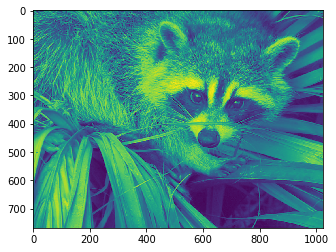

In [2]:
img = scipy.misc.face(gray=True)

plt.imshow(img);

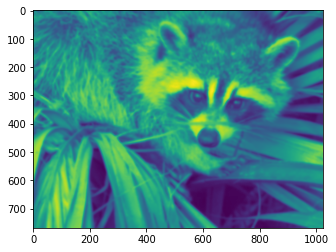

In [3]:
from scipy.ndimage import gaussian_filter

img_filtered = gaussian_filter(img, sigma=3)

plt.imshow(img_filtered, interpolation='gaussian');

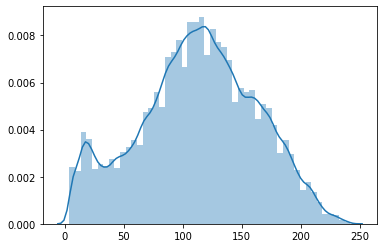

In [4]:
# Useless but informative
sns.distplot(img_filtered.flatten());

## Acutal function

In [5]:
def plot_new_raccoon(n=10000):
    
    new_pdf = img_filtered.flatten() 
    
    cdf = np.zeros(len(img.flatten()))
    val = 0

    for i in range(len(cdf)):
        val += new_pdf[i]
        cdf[i] = val


    rvs = np.random.uniform(np.min(cdf), np.max(cdf), n)

    new_ones = np.searchsorted(cdf, rvs)

    new_img = np.zeros(len(img.flatten()))

    for pixel in new_ones:
        new_img[pixel] = 1

    return new_img.reshape(img.shape[0], img.shape[1])

## CDF for visualization

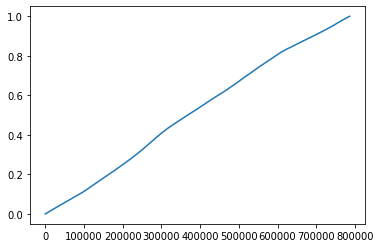

In [6]:
new_pdf = img.flatten() / np.sum(img.flatten())
    
cdf = np.zeros(len(img.flatten()))
val = 0

for i in range(len(cdf)):
    val += new_pdf[i]
    cdf[i] = val


rvs = np.random.uniform(np.min(cdf), np.max(cdf), 10000)

plt.plot(cdf)

<a name='1.1'></a>

### Exercise 1.1
### `Draw 10.000, 50.000, 100.000, 200.000, and 400.000 samples. What do you observe?`

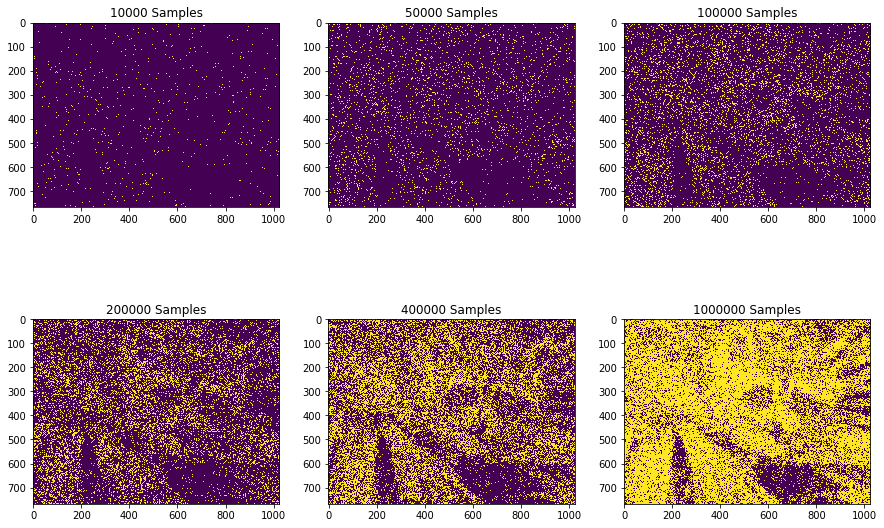

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))

ax[0,0].imshow(plot_new_raccoon(10000))
ax[0,0].set_title("10000 Samples")
ax[0,1].imshow(plot_new_raccoon(50000))
ax[0,1].set_title("50000 Samples")
ax[0,2].imshow(plot_new_raccoon(100000))
ax[0,2].set_title("100000 Samples")
ax[1,0].imshow(plot_new_raccoon(200000))
ax[1,0].set_title("200000 Samples")
ax[1,1].imshow(plot_new_raccoon(400000))
ax[1,1].set_title("400000 Samples")
ax[1,2].imshow(plot_new_raccoon(1000000))
ax[1,2].set_title("1000000 Samples")
plt.show()

<a name='2'></a>

## Exercise 2 Paren Window Estimator

`Use the Parzen Window Estimator to “reconstruct” the image. Thus, use the sampled density from the previous task as input, and output a density from the Parzen window estimator.
More in detail, Implement a Parzen window estimator with a box kernel. Use our empirical raccoon densities from the previous task as an input. Vary the window size of the Parzen estimator. What do you observe?`

<br>


#### A First Taste of the Model Selection Problem
Which kernel size is best suited for our raccoon density? Implement a cross- validation to automatically determine the best kernel size from a reasonably large list of candidate kernel sizes (with at least 3 candidate sizes). The objective function shall be chosen analogously to the lecture.

<a name='2.1'></a>

### Exercise 2.1

In [119]:
def parzen_window_estimator(n=10000, h=6, distribution=None):
    
    if(distribution is not None):
        sampled_density_n = distribution
    else:
        sampled_density = plot_new_raccoon(n)
        sampled_density_n = sampled_density.flatten()

    new_img = np.zeros(len(img.flatten()))

    N = np.sum(sampled_density_n == 1)

    for i in range(h, len(sampled_density_n)):
        x = sampled_density_n[i]

        bound = int(h/2)

        x_n = sampled_density_n[i - bound: i + bound + 1]

        new_img[i] = (1/N) * np.sum((1/h * (x_n)))
        
    return new_img.reshape(img.shape[0], img.shape[1])

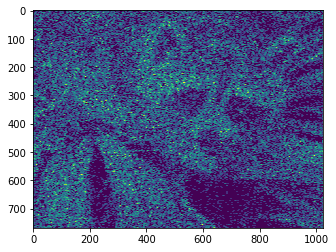

In [25]:
plt.imshow(new_img.reshape(img.shape[0], img.shape[1]));

## h = 6

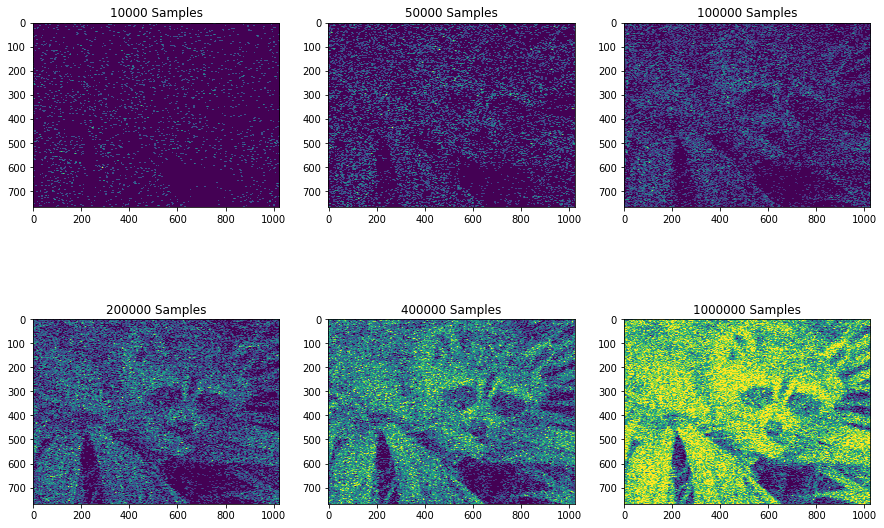

In [31]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))

ax[0,0].imshow(parzen_window_estimator(10000))
ax[0,0].set_title("10000 Samples")
ax[0,1].imshow(parzen_window_estimator(50000))
ax[0,1].set_title("50000 Samples")
ax[0,2].imshow(parzen_window_estimator(100000))
ax[0,2].set_title("100000 Samples")
ax[1,0].imshow(parzen_window_estimator(200000))
ax[1,0].set_title("200000 Samples")
ax[1,1].imshow(parzen_window_estimator(400000))
ax[1,1].set_title("400000 Samples")
ax[1,2].imshow(parzen_window_estimator(1000000))
ax[1,2].set_title("1000000 Samples")
plt.show()

## h = 64

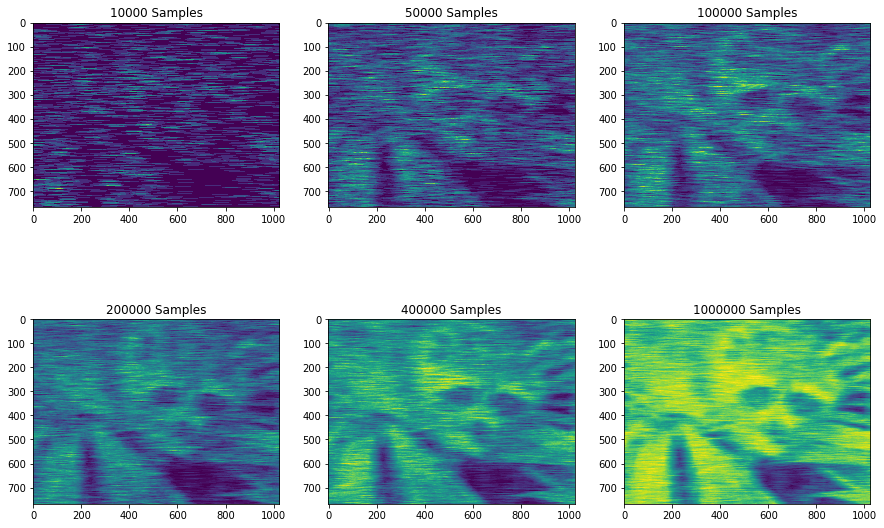

In [117]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))

ax[0,0].imshow(parzen_window_estimator(10000,64))
ax[0,0].set_title("10000 Samples")
ax[0,1].imshow(parzen_window_estimator(50000,64))
ax[0,1].set_title("50000 Samples")
ax[0,2].imshow(parzen_window_estimator(100000,64))
ax[0,2].set_title("100000 Samples")
ax[1,0].imshow(parzen_window_estimator(200000,64))
ax[1,0].set_title("200000 Samples")
ax[1,1].imshow(parzen_window_estimator(400000,64))
ax[1,1].set_title("400000 Samples")
ax[1,2].imshow(parzen_window_estimator(1000000,64))
ax[1,2].set_title("1000000 Samples")
plt.show()

# k - Fold Cross Validation

In [124]:
size = 100000

racoon = plot_new_raccoon(size).flatten()

k = 4
e = 10**(-100)

hs = np.arange(55,70)

summed_log_p = np.zeros(len(hs))

for x, h in enumerate(hs):
    
    kfold_set = []
    
    for i in range(k):
        image_skeleton = np.zeros((img.shape[0], img.shape[1])).flatten()
        image_skeleton[i::k] = racoon[i::k]
        
        kfold_set.append(image_skeleton)
        
    kfold_set = np.array(kfold_set)
    test_set = kfold_set[-1]
    
    current_p_x = 0
    
    for _ in range(kfold_set.shape[0] - 1):
        reconstructed = parzen_window_estimator(size, h, kfold_set[i]).flatten()
        
        non_zero_inc = np.nonzero(test_set)
        test_ind_train = reconstructed[non_zero_inc] + e
        p_x = np.sum(np.log(test_ind_train))
        current_p_x += p_x
        
    summed_log_p[x] = current_p_x

In [125]:
print("Best h is {}".format(hs[np.argmax(summed_log_p)]))

Best h is 56


## Best value Racoon Plot

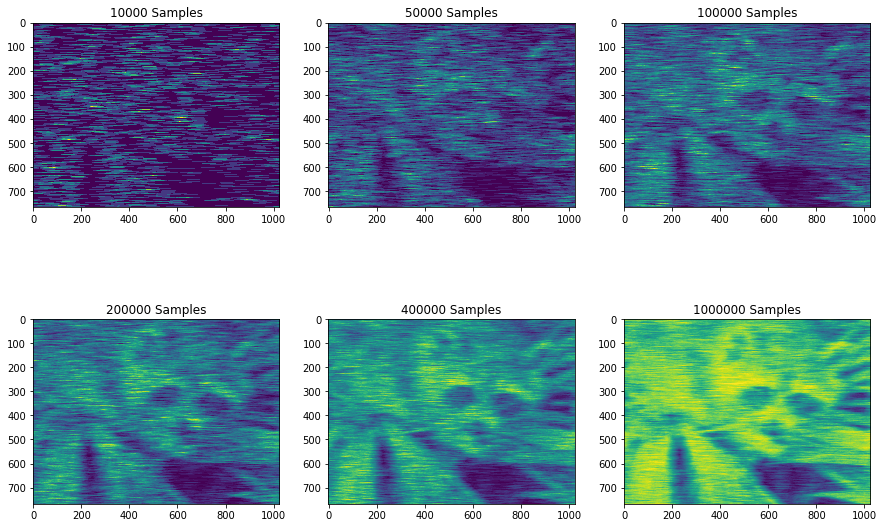

In [126]:
best_val = hs[np.argmax(summed_log_p)]

fig, ax = plt.subplots(2, 3, figsize=(15,10))

ax[0,0].imshow(parzen_window_estimator(10000,best_val))
ax[0,0].set_title("10000 Samples")
ax[0,1].imshow(parzen_window_estimator(50000,best_val))
ax[0,1].set_title("50000 Samples")
ax[0,2].imshow(parzen_window_estimator(100000,best_val))
ax[0,2].set_title("100000 Samples")
ax[1,0].imshow(parzen_window_estimator(200000,best_val))
ax[1,0].set_title("200000 Samples")
ax[1,1].imshow(parzen_window_estimator(400000,best_val))
ax[1,1].set_title("400000 Samples")
ax[1,2].imshow(parzen_window_estimator(1000000,best_val))
ax[1,2].set_title("1000000 Samples")
plt.show()